# Project Three - Frisbee Flight
Adi Sudhakar and George Tighe

In [1]:
from modsim import *

In [108]:
launch = SweepSeries()
launch = linrange(0, 95, 5)
#aattack = SweepSeries()
#aattack = linrange(-10, 15, 5)
aattack = 5.9
print(launch)
print(aattack)

[ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90]
5.9


In [109]:
system = System(m = 0.175, d = 0.27, v0 = 15, launch = launch, aattack = aattack, g = -9.8, 
                p_air = 1.225, dt = 0.1)
state = State(xpos = 0, zpos = 1.2, vx = 15, vz = 0)

In [110]:
def drag(system, state):
    unpack(system)
    A = 0.057 #m^2. Planform area of the frisbee
    cdi = SweepSeries()
    cdi[-10] = 0.15
    cdi[-3] = 0.08
    cdi[0] = 0.1
    cdi[5] = 0.15
    cdi[10] = 0.26
    cdi[15] = 0.39
    cdi[20] = 0.57
    cdi[25] = 0.75
    cdi[30] = 0.92
    cdf = interpolate(cdi)
    cdrag = cdf(aattack)
    
    fdrag = 0
    
    v = ((state.vx**2)+(state.vz**2))**(1/2)
    fdrag = (1/2)*p_air*A*cdrag*(v**2)
        
    return fdrag

In [111]:
print(drag(system, state))

1.3338320625000004


In [112]:
def lift(system, state,):
    unpack(system)
    A = 0.057 #m^2. Planform area of the frisbee
    cli = SweepSeries()
    cli[-10] = -0.225
    cli[-3] = 0
    cli[0] = 0.150
    cli[5] = 0.450
    cli[10] = 0.725
    cli[15] = 0.975
    cli[20] = 1.2
    cli[25] = 1.45
    cli[30] = 1.675
    clf = interpolate(cli)
    clift = clf(aattack)
    v = ((state.vx**2)+(state.vz**2))**(1/2)
    flift = (1/2)*p_air*A*clift*(v**2) #Lift force.
    return flift

In [113]:
print(lift(system,state))

3.923728593750001


In [114]:
def updatethefunc(system, state, t):
    
    unpack(system)
    
    fvert = lift(system, state) + m*g
    
    dvz = fvert*dt / m
    dvx = -drag(system, state)*dt / m
    
    vzf = dvz*dt + state.vz
    vxf = dvx*dt + state.vx
    
    xposf = state.xpos + (state.vx*dt)
    zposf = state.zpos + (state.vz*dt)
    
    newstate = State(xpos = xposf, zpos = zposf, vx = vxf, vz = vzf)
    
    
    return newstate

In [115]:
print(updatethefunc(system, state, 50))

xpos     1.500000
zpos     1.200000
vx      14.923781
vz       0.126213
dtype: float64


In [116]:
def runsimulation():
    frame = TimeFrame(columns = state.index)
    frame.row[0] = state
    ts = linrange(0, 80, system.dt)
    for t in ts:
            if frame.row[t].zpos > 0:
                frame.row[t+system.dt] = updatethefunc(system, frame.row[t], t)
            else: 
                break
    return frame

In [117]:
results = runsimulation()

In [118]:
print(results)

            xpos       zpos         vx        vz
0.0     0.000000   1.200000  15.000000  0.000000
0.1     1.500000   1.200000  14.923781  0.126213
0.2     2.992378   1.212621  14.848329  0.250169
0.3     4.477211   1.237638  14.773623  0.371933
0.4     5.954573   1.274832  14.699640  0.491568
0.5     7.424537   1.323988  14.626361  0.609132
0.6     8.887173   1.384902  14.553766  0.724684
0.7    10.342550   1.457370  14.481837  0.838279
0.8    11.790734   1.541198  14.410555  0.949969
0.9    13.231789   1.636195  14.339903  1.059806
1.0    14.665779   1.742175  14.269864  1.167839
1.1    16.092766   1.858959  14.200422  1.274115
1.2    17.512808   1.986371  14.131562  1.378679
1.3    18.925964   2.124239  14.063270  1.481576
1.4    20.332291   2.272396  13.995529  1.582847
1.5    21.731844   2.430681  13.928328  1.682534
1.6    23.124677   2.598934  13.861652  1.780675
1.7    24.510842   2.777002  13.795488  1.877308
1.8    25.890391   2.964733  13.729825  1.972469
1.9    27.263373   3

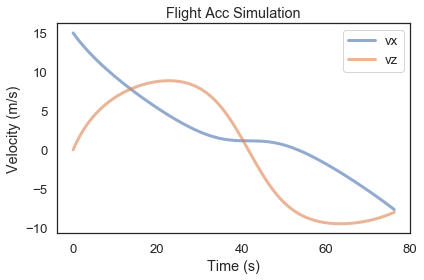

In [119]:
plot(results.vx, label = 'vx')
plot(results.vz, label = 'vz')
decorate(xlabel = 'Time (s)', ylabel = 'Velocity (m/s)', title = 'Flight Acc Simulation')

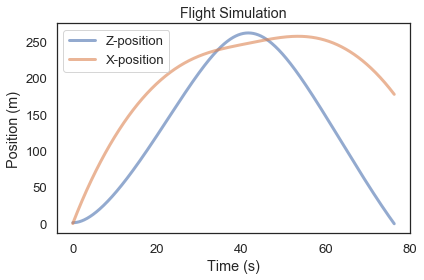

In [120]:
plot(results.zpos, label = 'Z-position')
plot(results.xpos, label = 'X-position')
decorate(xlabel = 'Time (s)', ylabel = 'Position (m)', title = 'Flight Simulation')

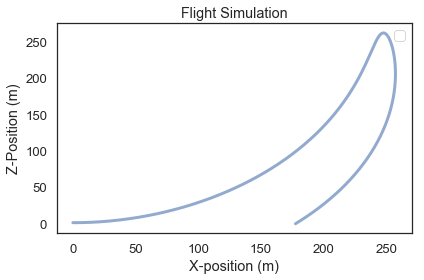

In [121]:
plot(results.xpos, results.zpos)
decorate(xlabel = 'X-position (m)', ylabel = 'Z-Position (m)', title = 'Flight Simulation')